In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

C:\Users\15783\AppData\Local\Temp\ipykernel_10924\606206881.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


[Job Application dataset](https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource) is to predict whether a applying candidate will be employed based on its progamming expereince and their attributes

In [2]:
raw_df=pandas.read_csv("data.csv",index_col=0)

display(raw_df)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Other than sex, the dataset also has following protected attributes:
- Age (Age)

In [3]:
print(f"The dataset contains {raw_df.shape[0]} entries")
print(f"Number of duplicate entries: {raw_df.duplicated().sum()}")

df=raw_df.drop_duplicates()

print(f"The dataset contains {df.shape[0]} unique entries")
print(f"This datasets has {df.shape[1]-1} features")

The dataset contains 73462 entries
Number of duplicate entries: 4
The dataset contains 73458 unique entries
This datasets has 13 features


In [4]:
label_column="Employed"

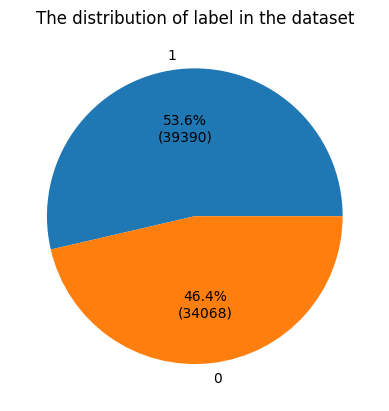

In [5]:
label_count = df[label_column].value_counts()

def autolabel(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

plt.pie(label_count,labels=label_count.index, autopct=lambda pct: autolabel(pct, label_count))
plt.title("The distribution of label in the dataset")
plt.show()

The label distribution is balanced for this dataset

In [6]:
sex_column="Gender"
privilleged_group="Man"

In [7]:
# Unifying attributes value to male and female for simplicity sake.
df[sex_column]=df[sex_column].replace("NonBinary","Woman")

C:\Users\15783\AppData\Local\Temp\ipykernel_10924\3737642170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sex_column]=df[sex_column].replace("NonBinary","Woman")


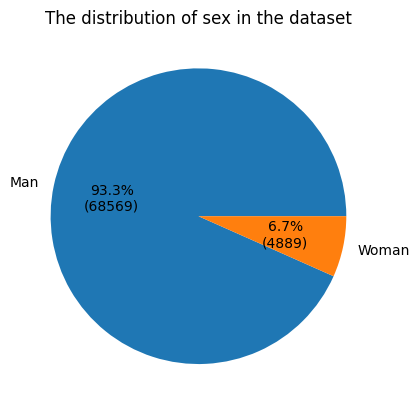

In [8]:
sex_count = df[sex_column].value_counts()

plt.pie(sex_count,labels=sex_count.index, autopct=lambda pct: autolabel(pct, sex_count))
plt.title("The distribution of sex in the dataset")
plt.show()

The distribution of protected attributes of the dataset is extremely unbalanced and heavily skewed towards privilleged groups

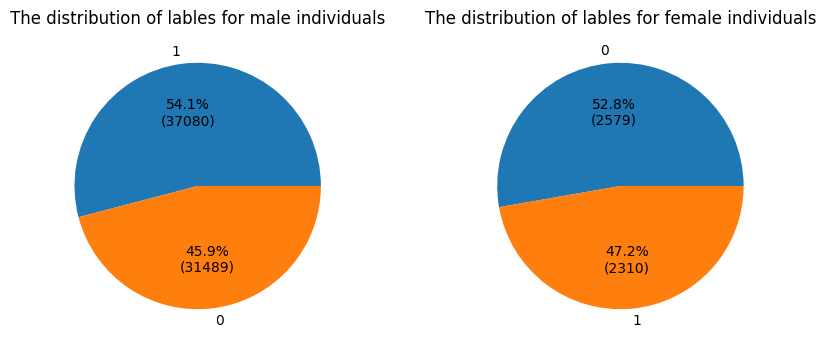

In [9]:
man_df=df.loc[df[sex_column]==privilleged_group].loc[:,[sex_column,label_column]]
woman_df=df.loc[df[sex_column]!=privilleged_group].loc[:,[sex_column,label_column]]

male_label_count=man_df[label_column].value_counts()
female_label_count=woman_df[label_column].value_counts()

fig, ax=plt.subplots(1,2,figsize=(10, 4))
ax[0].pie(male_label_count,labels=male_label_count.index, autopct=lambda pct: autolabel(pct, male_label_count))
ax[0].set_title("The distribution of lables for male individuals")
ax[1].pie(female_label_count,labels=female_label_count.index, autopct=lambda pct: autolabel(pct, female_label_count))
ax[1].set_title("The distribution of lables for female individuals")
plt.show()

The label distributions of both groups are relatively the same as the overall distribution.